In [1]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PREDICT 1 BDR HOUSE PRICES IN NORTH CAROLINA

In [2]:
# Read in the dataset for 1 bedroom house price prediction
nc_1bdr_final = pd.read_csv('./static/data/rw_nc_1bdr_final.csv')
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,Winterville,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


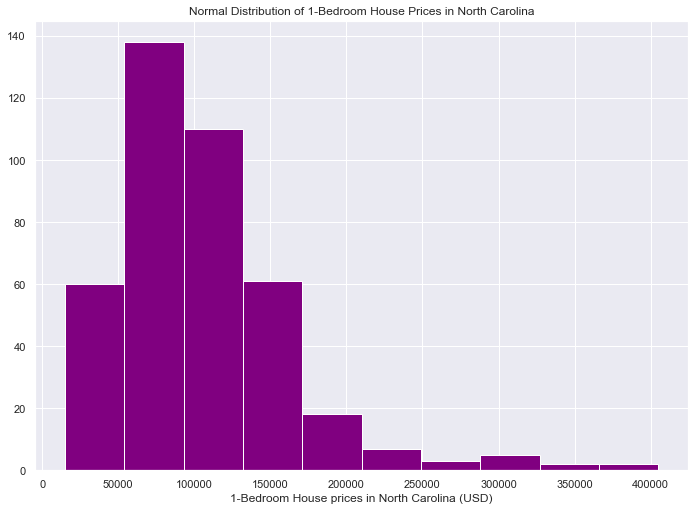

In [5]:
# Check distribution of house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(nc_1bdr_final['avg_house_price'], bins=10, color="purple")
plt.xlabel("1-Bedroom House prices in North Carolina (USD)")
plt.title("Normal Distribution of 1-Bedroom House Prices in North Carolina")

plt.savefig('./static/images/PriceDistribution_1bdr.png')
plt.show()

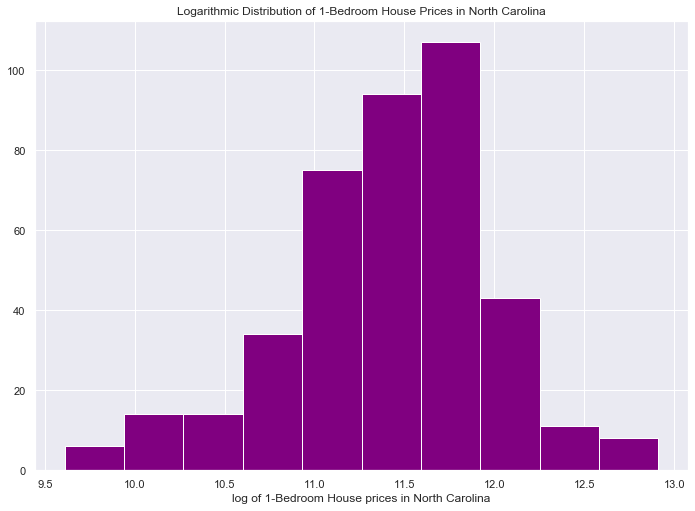

In [7]:
#Take logarithm of the target variable to normalize the distribution & make it more symmetrical
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(nc_1bdr_final['avg_house_price']), bins=10, color="purple")
plt.xlabel("log of 1-Bedroom House prices in North Carolina")
plt.title("Logarithmic Distribution of 1-Bedroom House Prices in North Carolina")
plt.savefig('./static/images/LogPriceDistribution_1bdr.png')
plt.show()

In [8]:
# Calculate measures:
print(f"Skew (Normal Distribution (1BDR)) is:", nc_1bdr_final['avg_house_price'].skew())
print(f"Kurtosis (Normal Distribution (1BDR)): %f" % nc_1bdr_final['avg_house_price'].kurt())

print(f"Skew (Logarithmic Distribution (1BDR)) is:", np.log(nc_1bdr_final['avg_house_price']).skew())
print(f"Kurtosis (Logarithmic Distribution (1BDR)): %f" % np.log(nc_1bdr_final['avg_house_price']).kurt())

Skew (Normal Distribution (1BDR)) is: 1.6613022573878196
Kurtosis (Normal Distribution (1BDR)): 4.674106
Skew (Logarithmic Distribution (1BDR)) is: -0.48467646873195797
Kurtosis (Logarithmic Distribution (1BDR)): 0.658466


In [9]:
#Creating new df to store log values of house Price
nc_1bdr_log = nc_1bdr_final
nc_1bdr_log.avg_house_price = np.log(nc_1bdr_log.avg_house_price)
nc_1bdr_log

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,11.648856,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,11.672492,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,10.464916,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,11.750078,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,12.823721,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,Winterville,28590,10.953600,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,12.521658,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,11.516484,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,11.645126,5,23538.0,2995.0,58514.0,12.724106


In [10]:
# Created a df without price to check coorelation among features
nc_1bdr_log_explore = nc_1bdr_log[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_1bdr_log_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
401,Winterville,28590,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


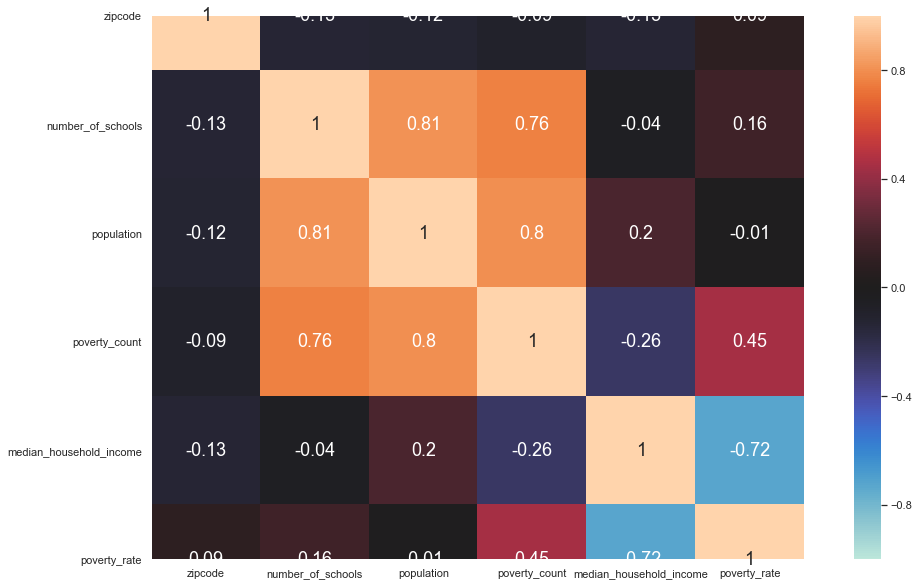

In [11]:
#check coorelation among features using seaborn library
nc_1bdr_log_corr_matrix = nc_1bdr_log_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_1bdr_log_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/LogCorrelation Matrix_1bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

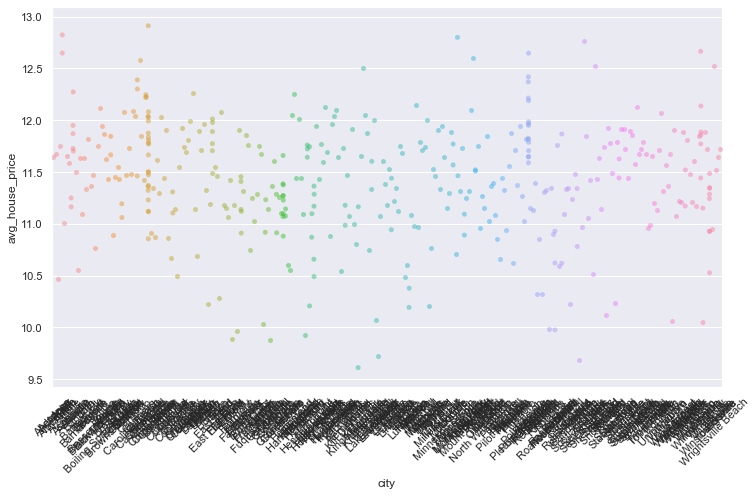

In [12]:
plt.figure(figsize=(12,7))
sns.stripplot(x = nc_1bdr_final["city"], 
              y = nc_1bdr_final["avg_house_price"],
              order = np.sort(nc_1bdr_final["city"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

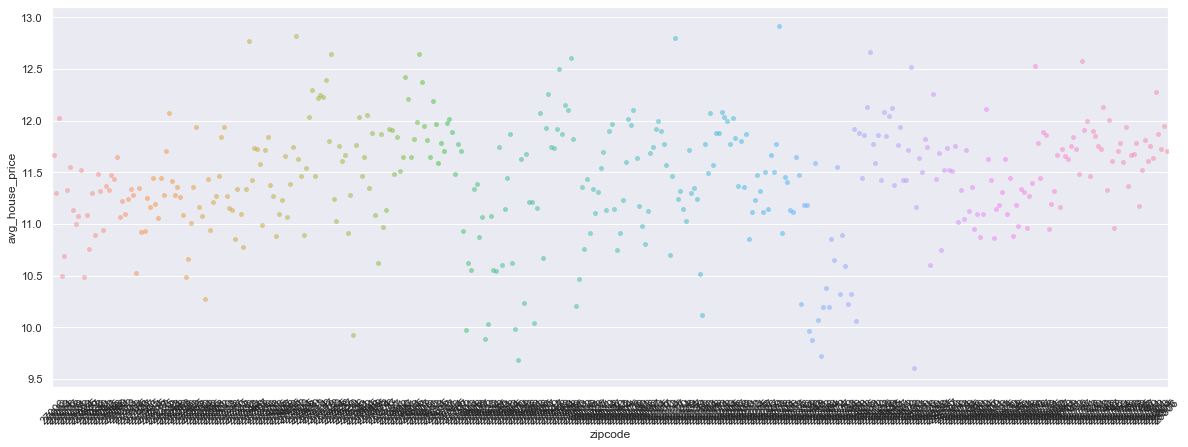

In [13]:
plt.figure(figsize=(20,7))
sns.stripplot(x = nc_1bdr_final["zipcode"], 
              y = nc_1bdr_final["avg_house_price"],
              order = np.sort(nc_1bdr_final["zipcode"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

In [ ]:
# # Created a df without price to check coorelation among features
# nc_1bdr_explore = nc_1bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
# nc_1bdr_explore

In [15]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_1bdr_log[i] = le.fit_transform(nc_1bdr_log[i])
#Dummy Variables:
nc_1bdr_log_final = pd.get_dummies(nc_1bdr_log, columns = var_mod)
nc_1bdr_log_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_396,zipcode_397,zipcode_398,zipcode_399,zipcode_400,zipcode_401,zipcode_402,zipcode_403,zipcode_404,zipcode_405
0,11.648856,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.672492,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.464916,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.750078,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.823721,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,10.953600,5,24613.0,2747.0,65594.0,11.160769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,12.521658,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,11.516484,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,11.645126,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
nc_1bdr_log_final.dtypes

avg_house_price            float64
number_of_schools            int64
population                 float64
poverty_count              float64
median_household_income    float64
                            ...   
zipcode_401                  uint8
zipcode_402                  uint8
zipcode_403                  uint8
zipcode_404                  uint8
zipcode_405                  uint8
Length: 715, dtype: object

In [18]:
# Define dependent and independent variables
X_1bdr = nc_1bdr_log_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_1bdr = nc_1bdr_log_final["avg_house_price"].values.reshape(-1,1)

In [19]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_1bdr, X_test_1bdr, y_train_1bdr, y_test_1bdr = train_test_split(X_1bdr, y_1bdr, random_state=42)

In [20]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_1bdr = LinearRegression()

In [21]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_1bdr.fit(X_train_1bdr, y_train_1bdr)
training_score_1bdr = model_1bdr.score(X_train_1bdr, y_train_1bdr)
testing_score_1bdr = model_1bdr.score(X_test_1bdr, y_test_1bdr)

# Print Scores
print(f"1 BDR Training Score: {training_score_1bdr}")
print(f"1 BDR Testing Score: {testing_score_1bdr}")

1 BDR Training Score: 1.0
1 BDR Testing Score: 0.23820667904000137


1 BDR Mean Squared Error (MSE): 0.2192249977181135
1 BDR R-squared (R2 ): 0.23820667904000137


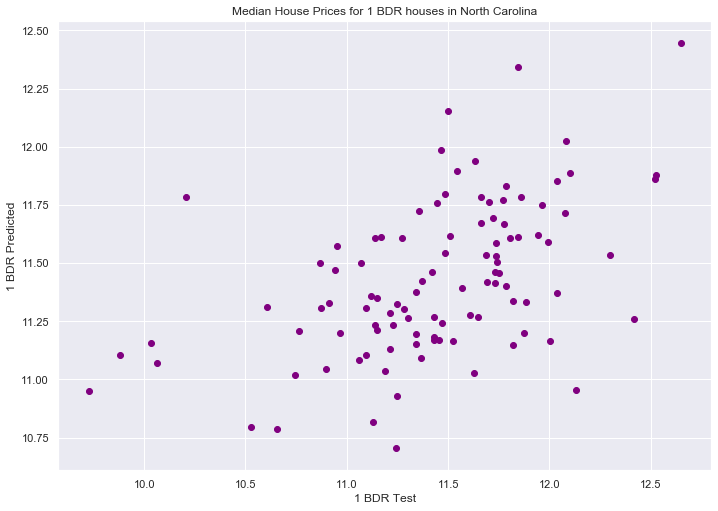

In [24]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_1bdr = model_1bdr.predict(X_test_1bdr)

# Score the predictions with mse and r2
mse_1bdr = mean_squared_error(y_test_1bdr, predicted_1bdr)
r2_1bdr = r2_score(y_test_1bdr, predicted_1bdr)
print(f"1 BDR Mean Squared Error (MSE): {mse_1bdr}")
print(f"1 BDR R-squared (R2 ): {r2_1bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_1bdr,predicted_1bdr, c="purple")

# Label plot
plt.xlabel('1 BDR Test')
plt.ylabel('1 BDR Predicted')

plt.title('Median House Prices for 1 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LogLinearRegression_1bdr.png')

# Show plot
plt.show()

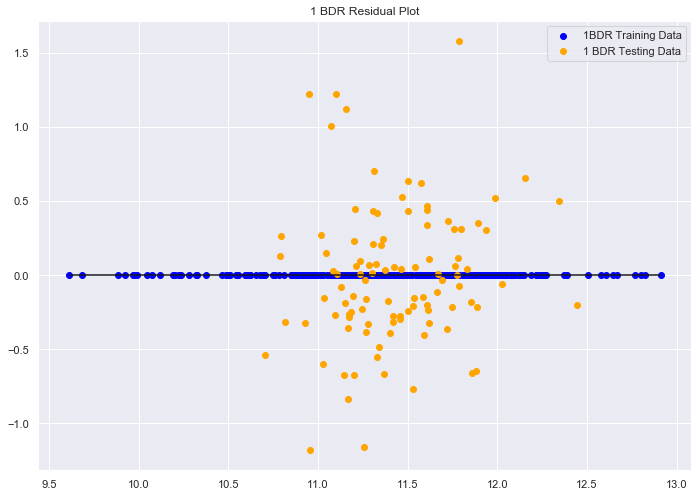

In [26]:
plt.scatter(model_1bdr.predict(X_train_1bdr), model_1bdr.predict(X_train_1bdr) - y_train_1bdr, c="blue", label="1BDR Training Data")

plt.scatter(model_1bdr.predict(X_test_1bdr), model_1bdr.predict(X_test_1bdr) - y_test_1bdr, c="orange", label="1 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_1bdr.min(), xmax=y_1bdr.max())

plt.title("1 BDR Residual Plot")
plt.savefig('./static/images/LogResidual Plot_1bdr.png')